In [1]:
from google.colab import files
uploaded = files.upload()

Saving Final_Assignment_Data.xlsx to Final_Assignment_Data.xlsx


In [177]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

#for linear regression
from sklearn.linear_model import LinearRegression


import statsmodels.api as sm
from sklearn import metrics

#for scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [3]:
#reading the excel file
df = pd.read_excel('Final_Assignment_Data.xlsx', sheet_name = 'Sheet1')

# Data Understanding

In [4]:
#reading the first 5 rows of the data
df.head() 

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


In [5]:
#reading the last 5 rows
df.tail() 

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
387,3.703704,NaN,27.0,4,1.40,0.86,2.790,15.6,82,0,1,1,0,0,ford mustang gl
388,2.272727,NaN,44.0,4,0.97,0.52,2.130,24.6,82,0,2,0,1,0,vw pickup
389,3.125000,NaN,32.0,4,1.35,0.84,2.295,11.6,82,0,1,1,0,0,dodge rampage
390,3.571429,NaN,28.0,4,1.20,0.79,2.625,18.6,82,0,1,1,0,0,ford ranger
391,3.225806,NaN,31.0,4,1.19,0.82,2.720,19.4,82,0,1,1,0,0,chevy s-10


In [6]:
#getting the total number of records and features present in the data
df.shape

(392, 15)

In [7]:
#checking the names of the features
df.columns

Index(['GallonsPer100Miles', 'GallonsPer100MilesTo1981', 'MPG', 'Cylinders',
       'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60',
       'Year', 'Year70To81', 'Origin', 'Origin.Eq.1', 'Origin.Eq.2',
       'Origin.Eq.3', 'Name'],
      dtype='object')

In [8]:
#getting the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
 14  Name      

So there are null values only on the "GallonsPer100MilesTo1981" feature in the data. And there are 13 features which are numeric and only one feature i.e. Name is object/string

In [9]:
df[df['GallonsPer100MilesTo1981'].isna()]

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
362,3.571429,NaN,28.0,4,1.12,0.88,2.605,19.6,82,0,1,1,0,0,chevrolet cavalier
363,3.703704,NaN,27.0,4,1.12,0.88,2.640,18.6,82,0,1,1,0,0,chevrolet cavalier wagon
364,2.941176,NaN,34.0,4,1.12,0.88,2.395,18.0,82,0,1,1,0,0,chevrolet cavalier 2-door
365,3.225806,NaN,31.0,4,1.12,0.85,2.575,16.2,82,0,1,1,0,0,pontiac j2000 se hatchback
366,3.448276,NaN,29.0,4,1.35,0.84,2.525,16.0,82,0,1,1,0,0,dodge aries se
367,3.703704,NaN,27.0,4,1.51,0.90,2.735,18.0,82,0,1,1,0,0,pontiac phoenix
368,4.166667,NaN,24.0,4,1.40,0.92,2.865,16.4,82,0,1,1,0,0,ford fairmont futura
369,2.777778,NaN,36.0,4,1.05,0.74,1.980,15.3,82,0,2,0,1,0,volkswagen rabbit l
370,2.702703,NaN,37.0,4,0.91,0.68,2.025,18.2,82,0,3,0,0,1,mazda glc custom l
371,3.225806,NaN,31.0,4,0.91,0.68,1.970,17.6,82,0,3,0,0,1,mazda glc custom


In [10]:
df_temp = df[df['GallonsPer100MilesTo1981'].notna()]

In [11]:
df_temp['Year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

So we can say that null values under "GallonsPer100MilesTo1981" feature is coming for the records for the year 1982.

In [12]:
df_temp

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,4.132231,4.132231,24.2,6,1.46,1.20,2.930,13.8,81,1,3,0,0,1,datsun 810 maxima
358,4.464286,4.464286,22.4,6,2.31,1.10,3.415,15.8,81,1,1,1,0,0,buick century
359,3.759398,3.759398,26.6,8,3.50,1.05,3.725,19.0,81,1,1,1,0,0,oldsmobile cutlass ls
360,4.950495,4.950495,20.2,6,2.00,0.88,3.060,17.1,81,1,1,1,0,0,ford granada gl


In [13]:
df_temp['check'] = np.where(df_temp['GallonsPer100Miles'] == df_temp['GallonsPer100MilesTo1981'], True, False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_temp['check'].nunique()

1

In [15]:
df_temp['check'].unique()

array([ True])

All values under 'GallonsPer100Miles' and 'GallonsPer100MilesTo1981' features are same for the years between 1970 to 1981. So we can drop 'GallonsPer100MilesTo1981' feature as we can work with 'GallonsPer100Miles' feature

In [16]:
del df_temp

In [17]:
#checking how many unique records are present in "Name" feature
len(df['Name'].unique())

301

In [18]:
for i in ['GallonsPer100Miles', 'GallonsPer100MilesTo1981', 'MPG', 'Cylinders','Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60',
       'Year', 'Year70To81', 'Origin', 'Origin.Eq.1', 'Origin.Eq.2','Origin.Eq.3']:
  length = df[i].nunique()
  print("The total unique values for {} feature is {}".format(i,length))  

The total unique values for GallonsPer100Miles feature is 127
The total unique values for GallonsPer100MilesTo1981 feature is 124
The total unique values for MPG feature is 127
The total unique values for Cylinders feature is 5
The total unique values for Displacement100ci feature is 81
The total unique values for Horsepower100 feature is 93
The total unique values for Weight1000lb feature is 346
The total unique values for Seconds0to60 feature is 95
The total unique values for Year feature is 13
The total unique values for Year70To81 feature is 2
The total unique values for Origin feature is 3
The total unique values for Origin.Eq.1 feature is 2
The total unique values for Origin.Eq.2 feature is 2
The total unique values for Origin.Eq.3 feature is 2


In [19]:
#checking the unique values present under Cylinders feature as it has only 5 features.
df['Cylinders'].unique()

array([8, 4, 6, 3, 5])

In [20]:
#checking the unique values present under Origin feature.
df['Origin'].unique()

array([1, 3, 2])

In [183]:
#creating a copy of the main data
data = df.copy()

In [184]:
#getting the number of reocrds and features
data.shape

(392, 15)

In [185]:
#creating a new feature origin_name from origin feature as mentioned in the document for better visualisation
data['origin_name'] = np.where(data['Origin'] == 1, 'US', np.where(data['Origin'] == 2, 'Europe', 'Japan'))

In [186]:
#changing the datatype of some features to string
data[['Cylinders','Year','Year70To81']] = data[['Cylinders','Year','Year70To81']].astype('object')

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    object 
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    object 
 9   Year70To81                392 non-null    object 
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
 14  Name      

In [188]:
#getting the count, mean, standard deviation, minimum value, first quartile(25%), second quartile(50%), third quartile(75%) and max value for the numeric features
data.describe()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
count,392.000000,362.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,4.782243,4.912568,23.445918,1.94412,1.044694,2.977584,15.541327,1.576531,0.625000,0.173469,0.201531
std,1.663944,1.659047,7.805007,1.04644,0.384912,0.849403,2.758864,0.805518,0.484742,0.379136,0.401656
min,2.145923,2.145923,9.000000,0.68000,0.460000,1.613000,8.000000,1.000000,0.000000,0.000000,0.000000
25%,3.448276,3.571429,17.000000,1.05000,0.750000,2.225250,13.775000,1.000000,0.000000,0.000000,0.000000
50%,4.396135,4.651163,22.750000,1.51000,0.935000,2.803500,15.500000,1.000000,1.000000,0.000000,0.000000
75%,5.882353,6.024744,29.000000,2.75750,1.260000,3.614750,17.025000,2.000000,1.000000,0.000000,0.000000
max,11.111111,11.111111,46.600000,4.55000,2.300000,5.140000,24.800000,3.000000,1.000000,1.000000,1.000000


In [189]:
#getting the count, number of unique values, top(the value which has the highest frequency) and freq(the number of times the top value has appeared)
data.describe(include = 'object')

,Cylinders,Year,Year70To81,Name,origin_name
count,392,392,392,392,392
unique,5,13,2,301,3
top,4,73,1,amc matador,US
freq,199,40,362,5,245


In [190]:
#checking for duplicate records in the data
duplicate = data[data.duplicated()]
duplicate

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name,origin_name


There are no duplicate records in the data

# Univariate Analysis

## For categorical Features

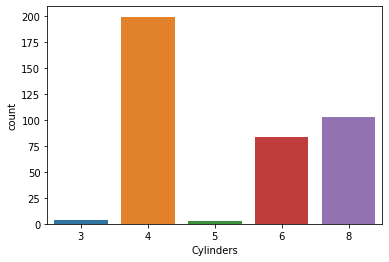

4    199
8    103
6     83
3      4
5      3
Name: Cylinders, dtype: int64

In [191]:
data_cylinders = sns.countplot(x = 'Cylinders', data = data)
plt.show()
data['Cylinders'].value_counts()

Cars with cylinder 4 were sold the highest and then followed by 8 and 6 cylinder cars. Cars with 3 and 5 cylinders were the lowest in number of sales.

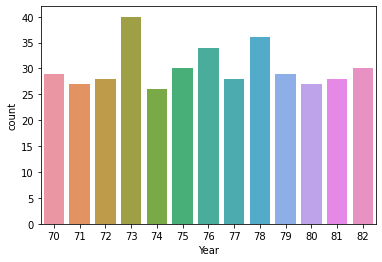

73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: Year, dtype: int64

In [192]:
data_years = sns.countplot(x = 'Year', data = data)
plt.show()
data['Year'].value_counts()

The highest number of cars sold was in year 1973 followed by 1978, 1976 respectively.

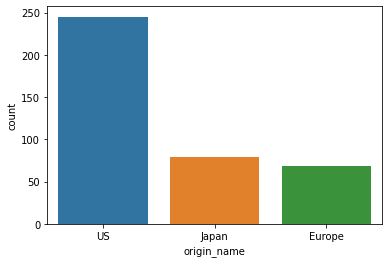

US        245
Japan      79
Europe     68
Name: origin_name, dtype: int64

In [193]:
data_origin_name = sns.countplot(x = 'origin_name', data = data)
plt.show()
data['origin_name'].value_counts()

Most of the cars sold in US from 1970 to 1981 are from US origin itself. Sales of Japan origin cars were better than Europe origin cars in US.

## For Numeric Features

"GallonsPer100Miles" and "MPG" features show the same data. we can calculate one from the other feature, so here I will be working with MPG

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

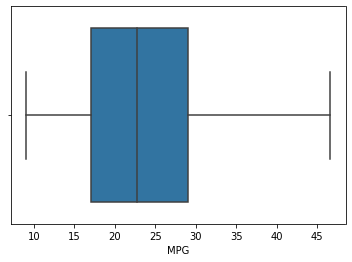

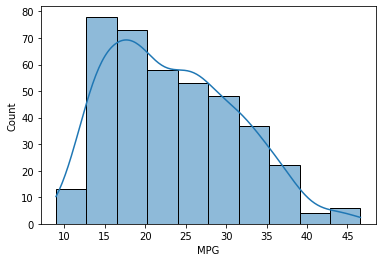

In [194]:
#checking the MPG feature
plt.figure(figsize = (6,4))
fig = sns.boxplot(x = 'MPG', data = data)

plt.figure(figsize = (6,4))
sns.histplot(data['MPG'],bins = 10, kde = True)

data['MPG'].describe()

There are no outliers present in the "MPG" feature. We can see that the data is slightly right skewed.

count    392.00000
mean       1.94412
std        1.04644
min        0.68000
25%        1.05000
50%        1.51000
75%        2.75750
max        4.55000
Name: Displacement100ci, dtype: float64

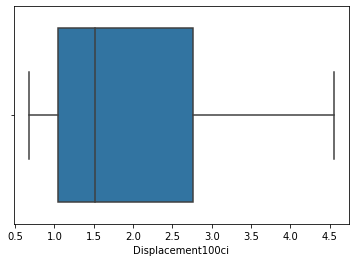

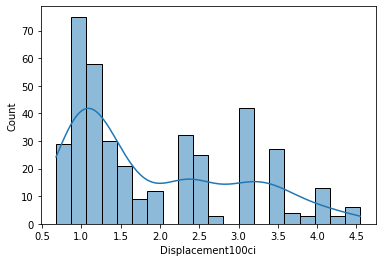

In [195]:
plt.figure(figsize = (6,4))
fig = sns.boxplot(x = 'Displacement100ci', data = data)

plt.figure(figsize = (6,4))
sns.histplot(data['Displacement100ci'],bins = 20, kde = True)

data['Displacement100ci'].describe()

The "Displacement100ci" has no outliers but is highly right skewed.

count    392.000000
mean       1.044694
std        0.384912
min        0.460000
25%        0.750000
50%        0.935000
75%        1.260000
max        2.300000
Name: Horsepower100, dtype: float64

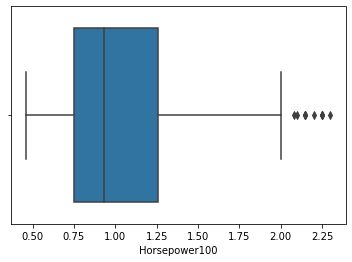

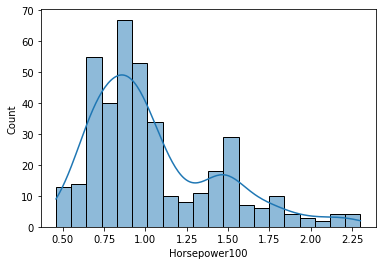

In [196]:
plt.figure(figsize = (6,4))
fig = sns.boxplot(x = 'Horsepower100', data = data)

plt.figure(figsize = (6,4))
sns.histplot(data['Horsepower100'],bins = 20, kde = True)

data['Horsepower100'].describe()

Here we can see that there are outliers for the "Horsepower100" feature. 


IQR = (Q3 - Q1) and upper limit = Q3 + 1.5 IQR and lower limit = Q1- 1.5 IQR.
In this case for Horsepower100, IQR = 1.26 - 0.75 = 0.51. So upper limit is 1.26 + 1.5*0.51 = 2.025

In [197]:
outliers_percent = len(data[data['Horsepower100'] > 2.025])/len(data)*100
print("The percentage of outliers present in Horsepower100 feature out of the total data is {0:.2f}%".format(outliers_percent))

The percentage of outliers present in Horsepower100 feature out of the total data is 2.55%


count    392.000000
mean       2.977584
std        0.849403
min        1.613000
25%        2.225250
50%        2.803500
75%        3.614750
max        5.140000
Name: Weight1000lb, dtype: float64

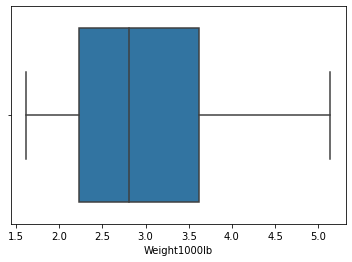

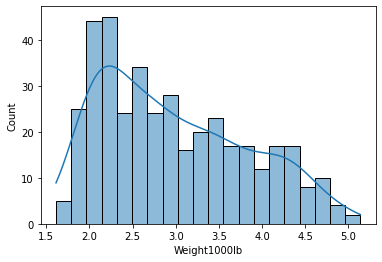

In [198]:
plt.figure(figsize = (6,4))
fig = sns.boxplot(x = 'Weight1000lb', data = data)

plt.figure(figsize = (6,4))
sns.histplot(data['Weight1000lb'],bins = 20, kde = True)

data['Weight1000lb'].describe()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    392.000000
mean      15.541327
std        2.758864
min        8.000000
25%       13.775000
50%       15.500000
75%       17.025000
max       24.800000
Name: Seconds0to60, dtype: float64

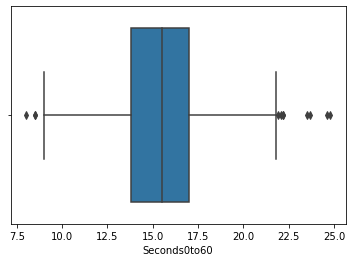

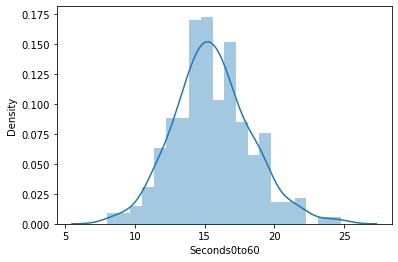

In [199]:
plt.figure(figsize = (6,4))
fig = sns.boxplot(x = 'Seconds0to60', data = data)

plt.figure(figsize = (6,4))
sns.distplot(data['Seconds0to60'],bins = 20)

data['Seconds0to60'].describe()

In this case, the IQR = 17.025 - 13.775 = 3.25. So the upper limit is 21.9 and lower limit is 8.9

In [200]:
len(data[data.Seconds0to60 <8.9])

3

In [201]:
len(data[data.Seconds0to60 > 21.9])

7

In [202]:
outliers_percent = len(data[((data.Seconds0to60 <8.9) | (data.Seconds0to60 > 21.9))])/len(data)*100
print("The percentage of outliers present in Seconds0to60 feature out of the total data is {0:.2f}%".format(outliers_percent))

The percentage of outliers present in Seconds0to60 feature out of the total data is 2.55%


In [203]:
data[((data.Seconds0to60 <8.9) | (data.Seconds0to60 > 21.9)) & (data['Horsepower100'] > 2.025)]

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name,origin_name
7,7.142857,7.142857,14.0,8,4.4,2.15,4.312,8.5,70,1,1,1,0,0,plymouth fury iii,US


# Bivariate Analysis



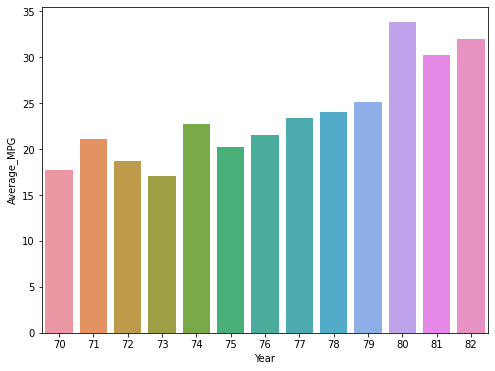

In [204]:
df1 = data.groupby(['Year'],as_index = 0).agg({'MPG':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'MPG':'Average_MPG'}, inplace = True)

sns.barplot(x = 'Year',y = 'Average_MPG', data = df1)
plt.show()

*   The graph shows the average MPG by all cars in each year.
*   It shows that as the years are advancing, cars with better mileage are getting sold in the market.



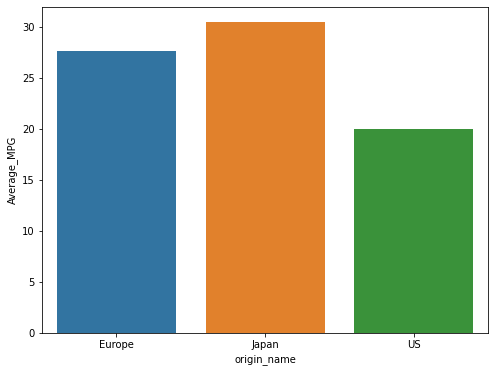

In [205]:
df1 = data.groupby(['origin_name'],as_index = 0).agg({'MPG':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'MPG':'Average_MPG'}, inplace = True)

sns.barplot(x = 'origin_name',y = 'Average_MPG', data = df1)
plt.show()



*   The graph shows the average MPG  in all these years by each of the car origin country.
*   Japan origin cars gave the highest average MPG, followed by Europe origin cars.
*   US cars though have the highest sales, have the lowest MPG

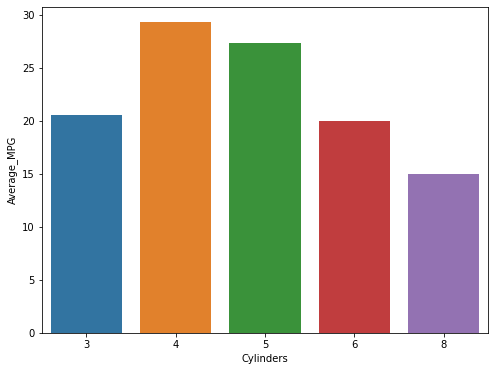

In [206]:
df1 = data.groupby(['Cylinders'],as_index = 0).agg({'MPG':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'MPG':'Average_MPG'}, inplace = True)

sns.barplot(x = 'Cylinders',y = 'Average_MPG', data = df1)
plt.show()



*   The graph shows the average MPG in all these years by each of the cylinders.



*   Cars with 4 cylinders had the highest MPG, followed by 5 cylinders but not much difference between the two.

*   Cars with 8 cylinders had the lowest average MPG



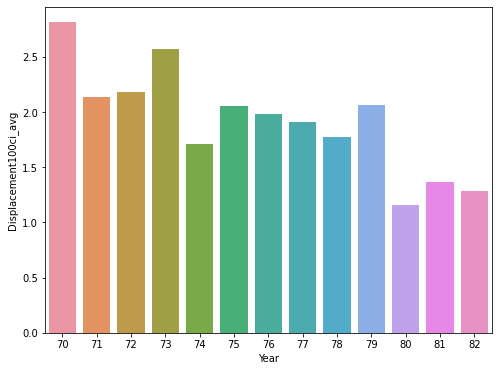

In [207]:
df1 = data.groupby(['Year'],as_index = 0).agg({'Displacement100ci':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'Displacement100ci':'Displacement100ci_avg'}, inplace = True)

sns.barplot(x = 'Year',y = 'Displacement100ci_avg', data = df1)
plt.show()

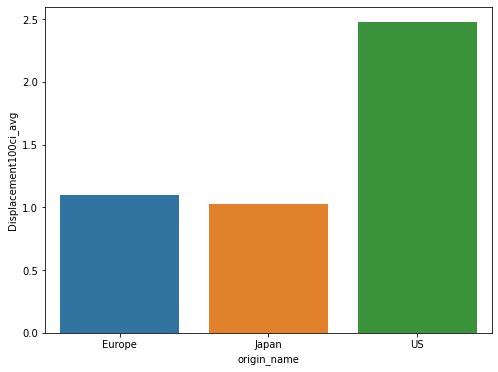

In [208]:
df1 = data.groupby(['origin_name'],as_index = 0).agg({'Displacement100ci':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'Displacement100ci':'Displacement100ci_avg'}, inplace = True)

sns.barplot(x = 'origin_name',y = 'Displacement100ci_avg', data = df1)
plt.show()

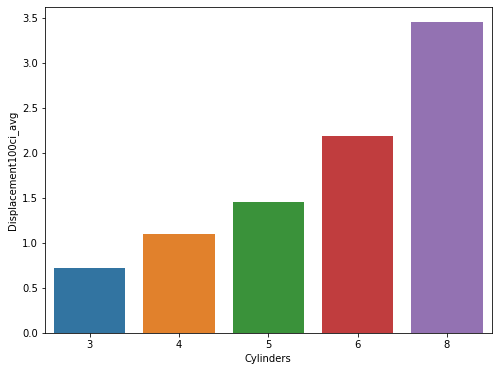

In [209]:
df1 = data.groupby(['Cylinders'],as_index = 0).agg({'Displacement100ci':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'Displacement100ci':'Displacement100ci_avg'}, inplace = True)

sns.barplot(x = 'Cylinders',y = 'Displacement100ci_avg', data = df1)
plt.show()

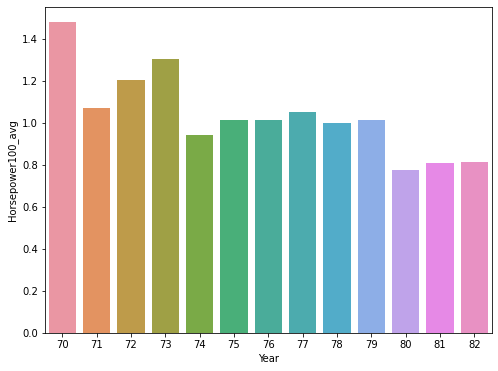

In [210]:

df1 = data.groupby(['Year'],as_index = 0).agg({'Horsepower100':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'Horsepower100':'Horsepower100_avg'}, inplace = True)

sns.barplot(x = 'Year',y = 'Horsepower100_avg', data = df1)
plt.show()

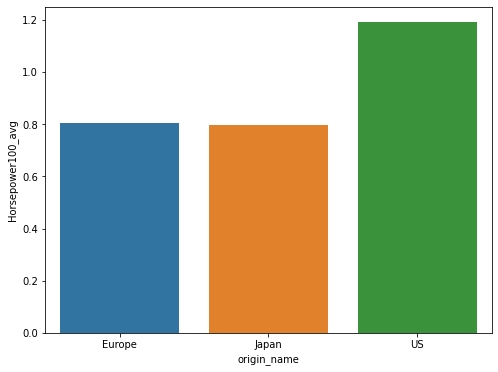

In [211]:
df1 = data.groupby(['origin_name'],as_index = 0).agg({'Horsepower100':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'Horsepower100':'Horsepower100_avg'}, inplace = True)

sns.barplot(x = 'origin_name',y = 'Horsepower100_avg', data = df1)
plt.show()

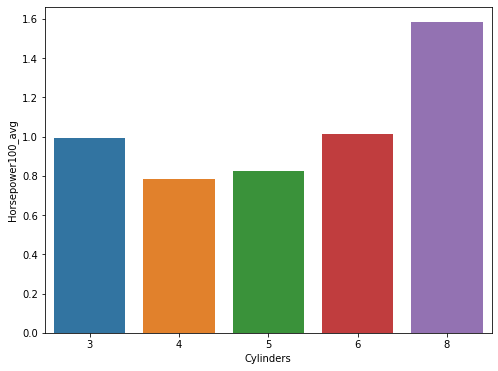

In [212]:
df1 = data.groupby(['Cylinders'],as_index = 0).agg({'Horsepower100':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'Horsepower100':'Horsepower100_avg'}, inplace = True)

sns.barplot(x = 'Cylinders',y = 'Horsepower100_avg', data = df1)
plt.show()

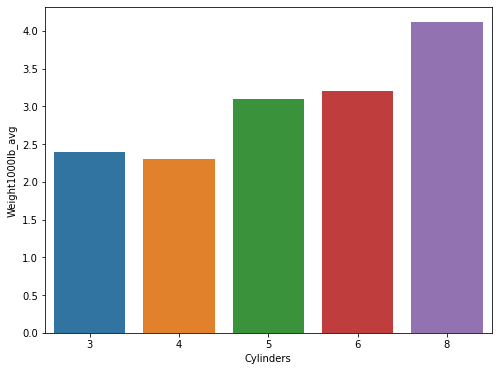

In [213]:
df1 = data.groupby(['Cylinders'],as_index = 0).agg({'Weight1000lb':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'Weight1000lb':'Weight1000lb_avg'}, inplace = True)

sns.barplot(x = 'Cylinders',y = 'Weight1000lb_avg', data = df1)
plt.show()

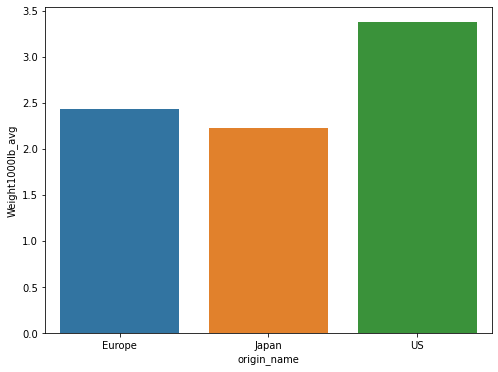

In [214]:
df1 = data.groupby(['origin_name'],as_index = 0).agg({'Weight1000lb':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'Weight1000lb':'Weight1000lb_avg'}, inplace = True)

sns.barplot(x = 'origin_name',y = 'Weight1000lb_avg', data = df1)
plt.show()

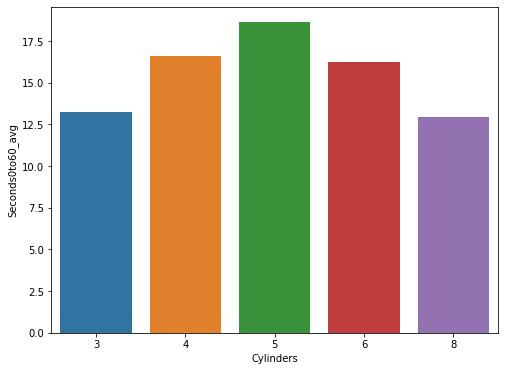

In [215]:
df1 = data.groupby(['Cylinders'],as_index = 0).agg({'Seconds0to60':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'Seconds0to60':'Seconds0to60_avg'}, inplace = True)

sns.barplot(x = 'Cylinders',y = 'Seconds0to60_avg', data = df1)
plt.show()

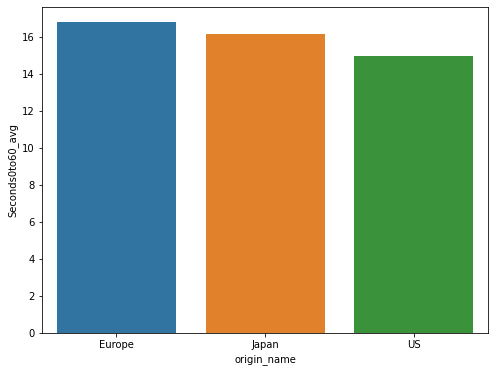

In [216]:
df1 = data.groupby(['origin_name'],as_index = 0).agg({'Seconds0to60':'mean'})
plt.figure(figsize = (8,6))
df1.rename(columns = {'Seconds0to60':'Seconds0to60_avg'}, inplace = True)

sns.barplot(x = 'origin_name',y = 'Seconds0to60_avg', data = df1)
plt.show()

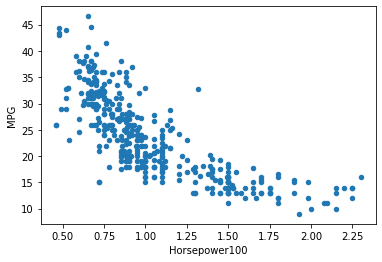

In [217]:
data.plot(kind = 'scatter', x = 'Horsepower100', y = 'MPG')
plt.show()





*   The graph shows the scatter plot of Horsepower100 vs MPG.
*   We can see that as the horsepower increased the MPG decreased.



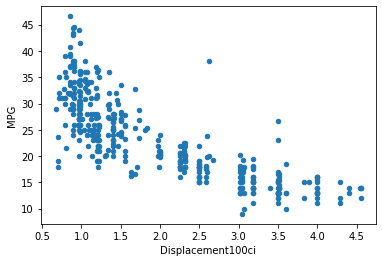

In [218]:
data.plot(kind = 'scatter', x = 'Displacement100ci', y = 'MPG')
plt.show()




*   The graph shows the scatter plot between displacement and MPG
*   We see that as the displacement increased MPG decreased, i.e. there is a negative trend between the two.



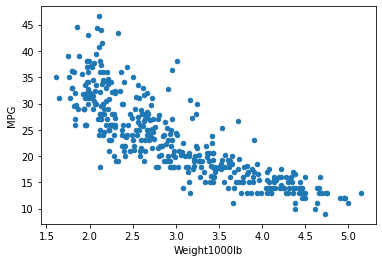

In [219]:
data.plot(kind = 'scatter', x = 'Weight1000lb', y = 'MPG')
plt.show()





*   The graph shows the scatter plot between Weight and MPG
*   And we can see that as the weight increased, MPG decreased.



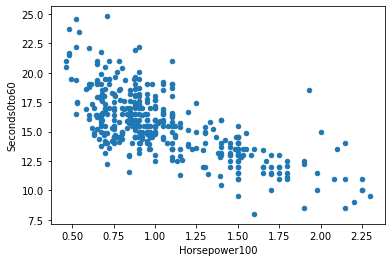

In [220]:
data.plot(kind = 'scatter', x = 'Horsepower100', y = 'Seconds0to60')
plt.show()

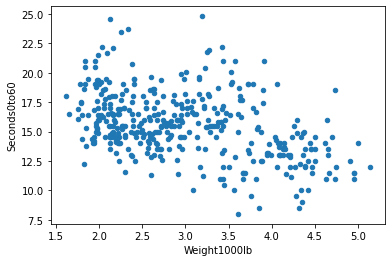

In [221]:
data.plot(kind = 'scatter', x = 'Weight1000lb', y = 'Seconds0to60')
plt.show()

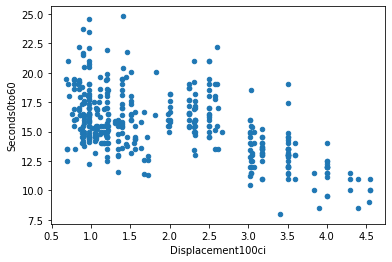

In [222]:
data.plot(kind = 'scatter', x = 'Displacement100ci', y = 'Seconds0to60')
plt.show()

# Multivariate Analysis

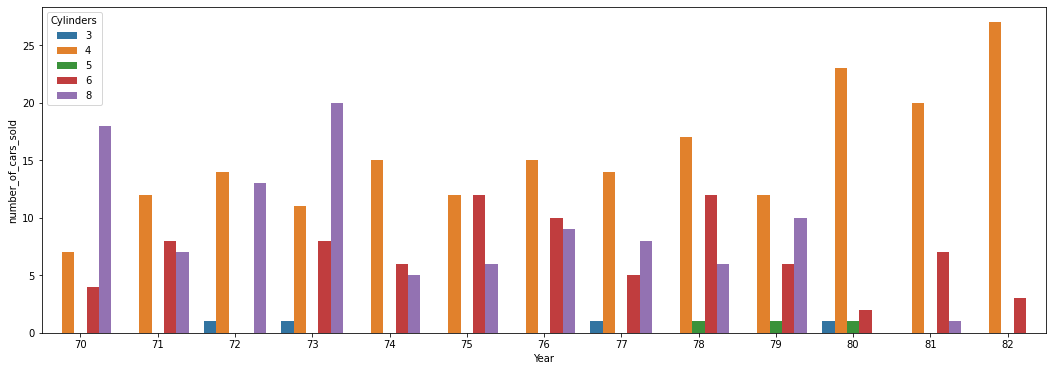

In [223]:
df1 = data.groupby(['Year','Cylinders'],as_index = 0).agg({'origin_name':'count'})
df1.rename(columns = {'origin_name':'number_of_cars_sold'}, inplace = True)

plt.figure(figsize = (18,6))
sns.barplot(x = 'Year',y = 'number_of_cars_sold', hue = 'Cylinders', data = df1)
plt.show()

 



*   The graph shows the number of cars sold in each year for different types of cylinders.
*   We can see that the sales of cars with 4 cylinders increasing year by year.
*   And we can see that the sales of cars with 8 cylinders decreased drastically over the years specially after 1979.





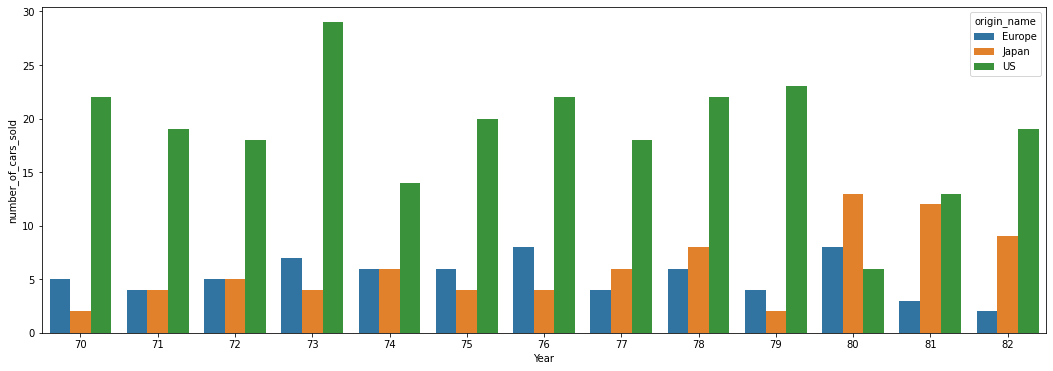

In [224]:
df1 = data.groupby(['Year','origin_name'],as_index = 0).agg({'Cylinders':'count'})
df1.rename(columns = {'Cylinders':'number_of_cars_sold'}, inplace = True)

plt.figure(figsize = (18,6))
sns.barplot(x = 'Year',y = 'number_of_cars_sold', hue = 'origin_name', data = df1)
plt.show()

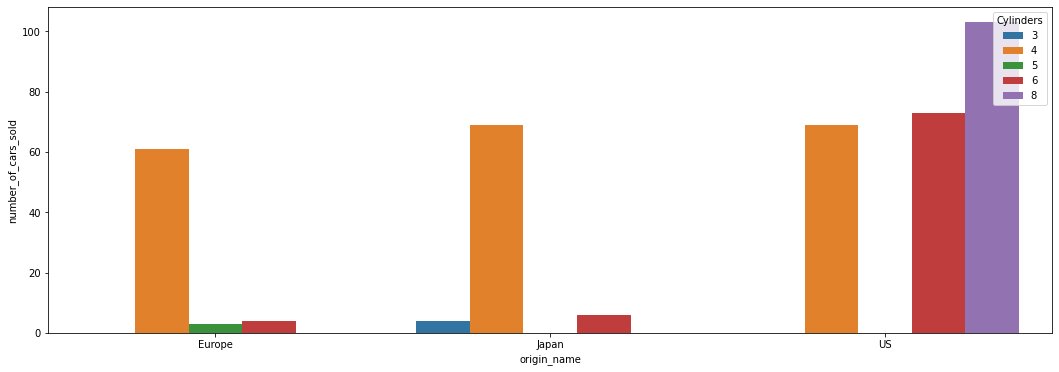

In [225]:
df1 = data.groupby(['origin_name','Cylinders'],as_index = 0).agg({'Year':'count'})
df1.rename(columns = {'Year':'number_of_cars_sold'}, inplace = True)

plt.figure(figsize = (18,6))
sns.barplot(x = 'origin_name',y = 'number_of_cars_sold', hue = 'Cylinders', data = df1)
plt.show()










*   This shows the number of cars of each type of cylinders by different origin country of the cars that got sold in the U.S.
*   Among Europe and Japan origin cars sold in the U.S are mainly cars with 4 cylinders. 
*   The sales of 4 cylinders cars of Europe and Japan origin cars almost equal when compared to U.S origin cars.
*   Cars with 6 cylinders and 8 cylinders of U.S origin are the ones which had very high sales. But 8 cylinders cars sales decreased drastically as we can see in the above graph



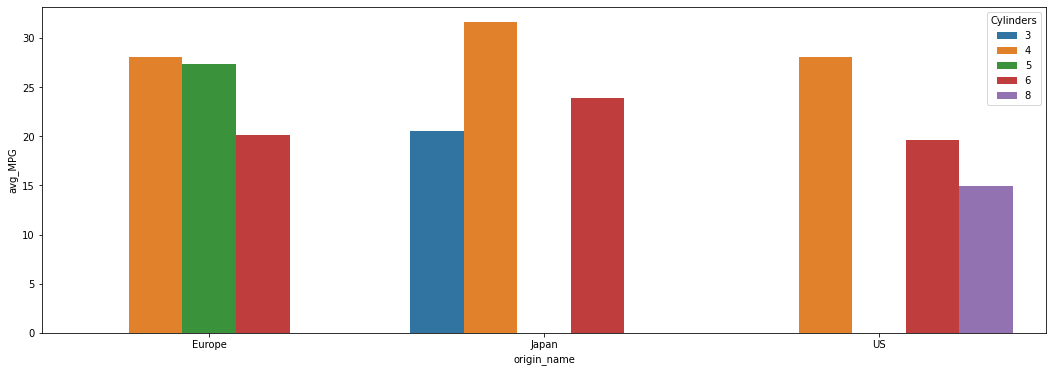

In [226]:
df1 = data.groupby(['origin_name','Cylinders'],as_index = 0).agg({'MPG':'mean'})
df1.rename(columns = {'MPG':'avg_MPG'}, inplace = True)

plt.figure(figsize = (18,6))
sns.barplot(x = 'origin_name',y = 'avg_MPG', hue = 'Cylinders', data = df1)
plt.show()

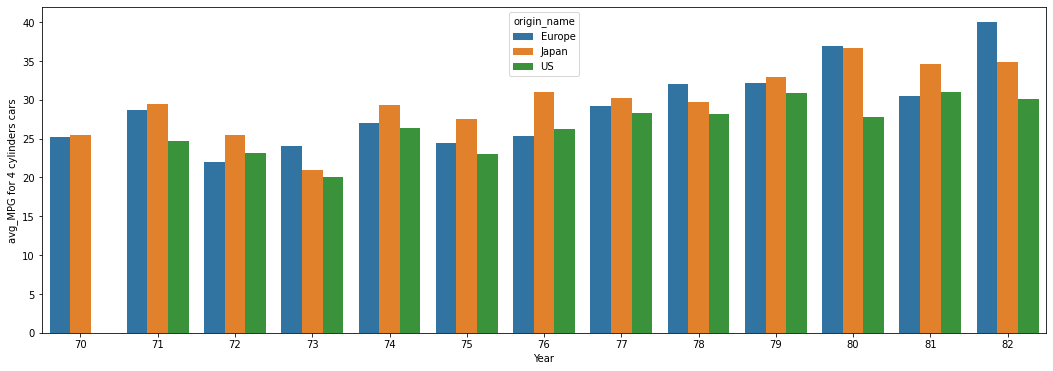

In [227]:
data_temp = data[data['Cylinders'] == 4]
df1 = data_temp.groupby(['Year','origin_name'],as_index = 0).agg({'MPG':'mean'})
df1.rename(columns = {'MPG':'avg_MPG for 4 cylinders cars'}, inplace = True)

plt.figure(figsize = (18,6))
sns.barplot(x = 'Year',y = 'avg_MPG for 4 cylinders cars', hue = 'origin_name', data = df1)
plt.show()






*   This graph shows the average MPG that was given by 4 cylinder cars by different origin cars in each of the years.
*   Though Japan origin cars were most efficient as we have seen in slide 8 but Europe origin cars have given almost the same efficiency as Japan origin cars considering the recent 5 years i.e. from 1978 to 1982.
*   Specially in last two where the MPG had almost been same for Japan origin cars, MPG for Europe origin had increased.


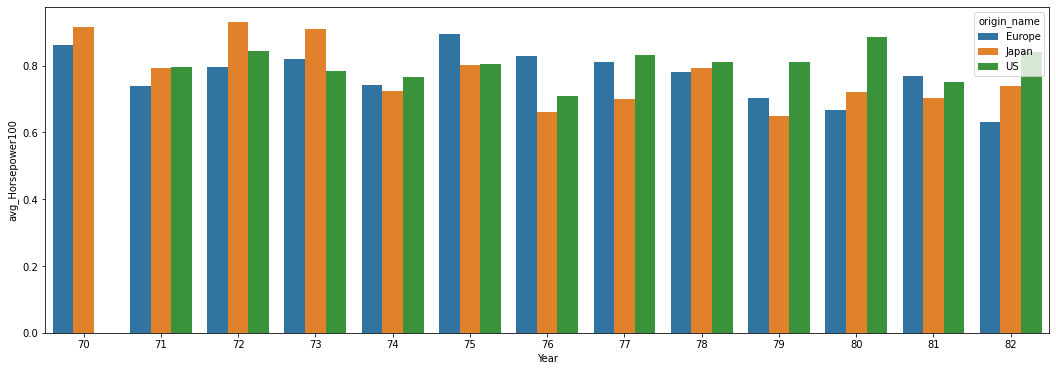

In [228]:
data_temp = data[data['Cylinders'] == 4]
df1 = data_temp.groupby(['Year','origin_name'],as_index = 0).agg({'Horsepower100':'mean'})
df1.rename(columns = {'Horsepower100':'avg_Horsepower100'}, inplace = True)

plt.figure(figsize = (18,6))
sns.barplot(x = 'Year',y = 'avg_Horsepower100', hue = 'origin_name', data = df1)
plt.show()



*   This graph shows the average horse power of cars with 4cylinders sold in each year of different origin.
*   It shows that for better MPG the cars had power between 0.6 to 0.8 horsepower. When the horsepower was between this range, it gave a MPG of at least 30.
*   Greater was the horsepower lesser was the MPG.


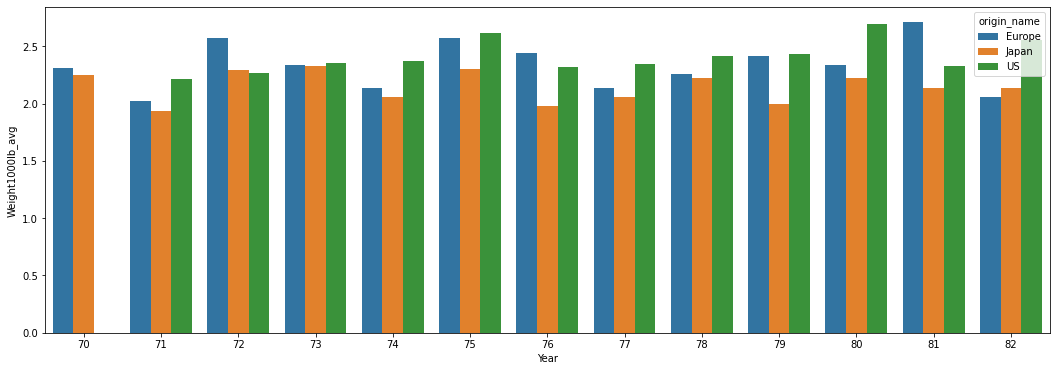

In [229]:
data_temp = data[data['Cylinders'] == 4]
df1 = data_temp.groupby(['Year','origin_name'],as_index = 0).agg({'Weight1000lb':'mean'})
df1.rename(columns = {'Weight1000lb':'Weight1000lb_avg'}, inplace = True)

plt.figure(figsize = (18,6))
sns.barplot(x = 'Year',y = 'Weight1000lb_avg', hue = 'origin_name', data = df1)
plt.show()






*  This graph shows the average weight(in pounds) of cars with 4cylinders sold in each year of different origin.
*   It can be seen that in most of the years, cars whose weight was near to 2pounds gave better MPG



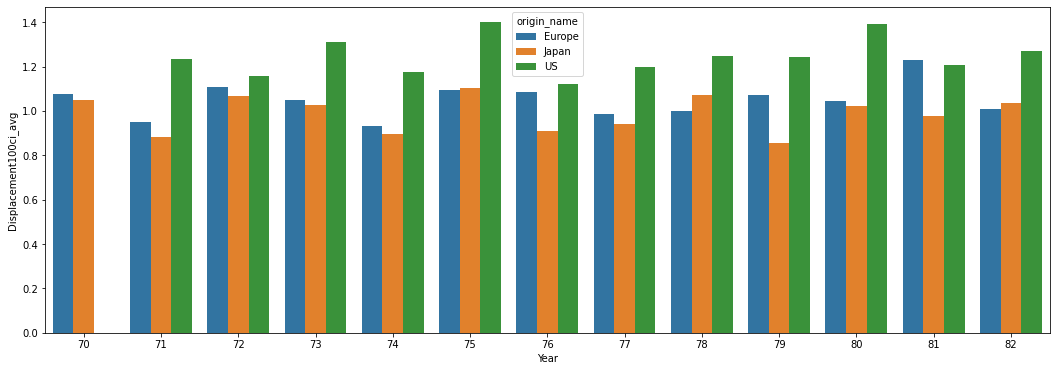

In [230]:
data_temp = data[data['Cylinders'] == 4]
df1 = data_temp.groupby(['Year','origin_name'],as_index = 0).agg({'Displacement100ci':'mean'})
df1.rename(columns = {'Displacement100ci':'Displacement100ci_avg'}, inplace = True)

plt.figure(figsize = (18,6))
sns.barplot(x = 'Year',y = 'Displacement100ci_avg', hue = 'origin_name', data = df1)
plt.show()




*   This graph shows the average displacement of cars with 4cylinders sold in each year of different origin.
*   We can see that in most of the years when average displacement was between 0.8 to 1.0, it resulted in better average MPG for that year.



In [231]:
df1 = data.groupby(['Year','origin_name','Cylinders'],as_index = False).agg({'MPG':'count'})
print(df1[df1['Year'] == 70])
print(df1[df1['Year'] == 71])

   Year origin_name  Cylinders  MPG
0    70      Europe          4    5
1    70       Japan          4    2
2    70          US          6    4
3    70          US          8   18
   Year origin_name  Cylinders  MPG
4    71      Europe          4    4
5    71       Japan          4    4
6    71          US          4    4
7    71          US          6    8
8    71          US          8    7


In [232]:
#to get the top 10 cars with highest MPG
df1 = data.groupby(['origin_name','Name','Cylinders','Displacement100ci','Weight1000lb','Horsepower100','Seconds0to60'],as_index = False).agg({'MPG':'mean'}).sort_values('MPG', ascending=False)
df1.head(10)

,origin_name,Name,Cylinders,Displacement100ci,Weight1000lb,Horsepower100,Seconds0to60,MPG
107,Japan,mazda glc,4,0.86,2.110,0.65,17.9,46.6
99,Japan,honda civic 1500 gl,4,0.91,1.850,0.67,13.8,44.6
66,Europe,vw rabbit c (diesel),4,0.90,2.085,0.48,21.7,44.3
63,Europe,vw pickup,4,0.97,2.130,0.52,24.6,44.0
62,Europe,vw dasher (diesel),4,0.90,2.335,0.48,23.7,43.4
51,Europe,volkswagen rabbit custom diesel,4,0.90,1.985,0.48,21.5,43.1
65,Europe,vw rabbit,4,0.98,2.144,0.76,14.7,41.5
72,Japan,datsun 210,4,0.85,2.110,0.65,19.2,40.8
87,Japan,datsun b210 gx,4,0.85,2.070,0.70,18.6,39.4
143,Japan,toyota starlet,4,0.79,1.755,0.58,16.9,39.1


In [233]:
#to get the top cars with lowest MPG
df1 = data.groupby(['origin_name','Name','Cylinders','Displacement100ci','Weight1000lb','Horsepower100','Seconds0to60'],as_index = False).agg({'MPG':'mean'}).sort_values('MPG', ascending=True)
df1.head(10)

,origin_name,Name,Cylinders,Displacement100ci,Weight1000lb,Horsepower100,Seconds0to60,MPG
322,US,hi 1200d,8,3.04,4.732,1.93,18.5,9.0
280,US,ford f250,8,3.60,4.615,2.15,14.0,10.0
238,US,chevy c20,8,3.07,4.376,2.00,15.0,10.0
265,US,dodge d200,8,3.18,4.382,2.10,13.5,11.0
340,US,oldsmobile omega,8,3.50,3.664,1.80,11.0,11.0
328,US,mercury marquis,8,4.29,4.633,2.08,11.0,11.0
217,US,chevrolet impala,8,4.00,4.997,1.50,14.0,11.0
329,US,mercury marquis brougham,8,4.29,4.952,1.98,11.5,12.0
343,US,oldsmobile vista cruiser,8,3.50,4.499,1.80,12.5,12.0
339,US,oldsmobile delta 88 royale,8,3.50,4.456,1.60,13.5,12.0


In [234]:
#to get the top 10 cars with best acceleration
df1 = data.groupby(['origin_name','Name','Cylinders','Displacement100ci','Weight1000lb','Horsepower100','MPG'],as_index = False).agg({'Seconds0to60':'mean'}).sort_values('Seconds0to60', ascending=True)
df1.head(10)

,origin_name,Name,Cylinders,Displacement100ci,Weight1000lb,Horsepower100,MPG,Seconds0to60
344,US,plymouth 'cuda 340,8,3.40,3.609,1.60,14.0,8.0
147,US,amc ambassador dpl,8,3.90,3.850,1.90,15.0,8.5
356,US,plymouth fury iii,8,4.40,4.312,2.15,14.0,8.5
218,US,chevrolet impala,8,4.54,4.354,2.20,14.0,9.0
381,US,pontiac grand prix,8,4.00,4.278,2.30,16.0,9.5
222,US,chevrolet monte carlo,8,4.00,3.761,1.50,15.0,9.5
181,US,buick estate wagon (sw),8,4.55,3.086,2.25,14.0,10.0
290,US,ford galaxie 500,8,4.29,4.341,1.98,15.0,10.0
252,US,dodge challenger se,8,3.83,3.563,1.70,15.0,10.0
378,US,pontiac catalina,8,4.55,4.425,2.25,14.0,10.0


In [235]:
data_new = data.copy()

In [236]:
data_new.drop(['Name','GallonsPer100Miles'],axis = 1, inplace = True)

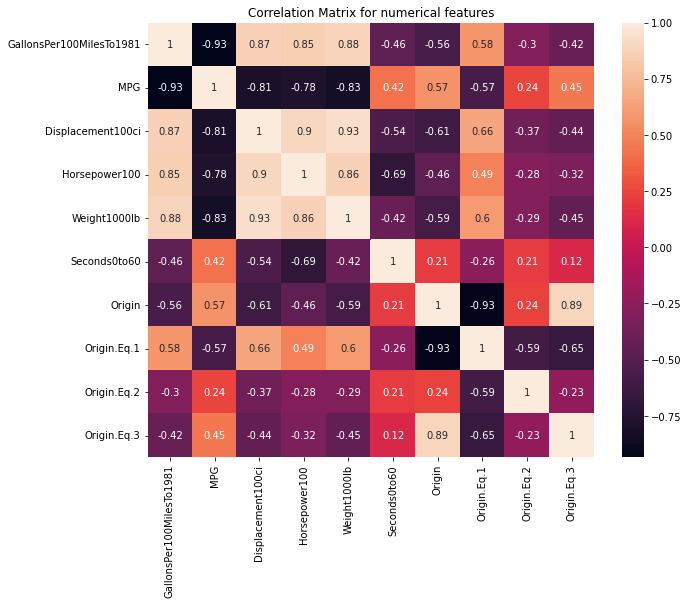

In [237]:
plt.figure(figsize=(10,8))
sns.heatmap(data_new.corr(), annot=True)
plt.title('Correlation Matrix for numerical features')
plt.show()

# Data Transformation and Cleaning

We have outliers for "Seconds0to60" and "Horsepower100" features. We need to consult business expert before removing or caping or replacing the outliers. But for now I am caping the outliers of these two features.

In [238]:
data['Seconds0to60'] = np.where(data['Seconds0to60'] > 21.9, 21.9,np.where(data['Seconds0to60'] < 8.9, 8.9,data['Seconds0to60']))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    392.000000
mean      15.520663
std        2.678799
min        8.900000
25%       13.775000
50%       15.500000
75%       17.025000
max       21.900000
Name: Seconds0to60, dtype: float64

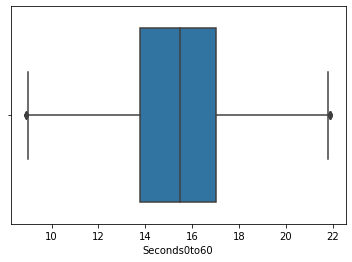

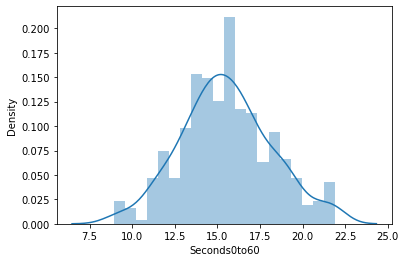

In [239]:
plt.figure(figsize = (6,4))
fig = sns.boxplot(x = 'Seconds0to60', data = data)

plt.figure(figsize = (6,4))
sns.distplot(data['Seconds0to60'],bins = 20)

data['Seconds0to60'].describe()

In [240]:
data['Horsepower100'] = np.where(data['Horsepower100'] > 2.025, 2.025,data['Horsepower100'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    392.000000
mean       1.040536
std        0.373047
min        0.460000
25%        0.750000
50%        0.935000
75%        1.260000
max        2.025000
Name: Horsepower100, dtype: float64

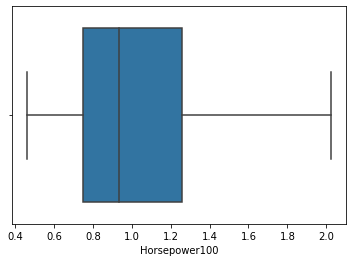

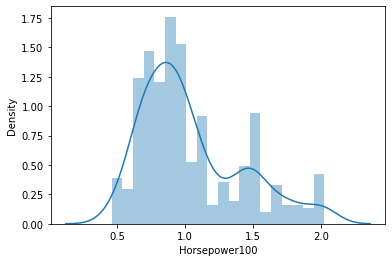

In [241]:
plt.figure(figsize = (6,4))
fig = sns.boxplot(x = 'Horsepower100', data = data)

plt.figure(figsize = (6,4))
sns.distplot(data['Horsepower100'],bins = 20)

data['Horsepower100'].describe()

In [242]:
data.drop(['GallonsPer100Miles','GallonsPer100MilesTo1981','Year','Origin','Origin.Eq.1','Origin.Eq.2','Origin.Eq.3','Name'], axis =1 , inplace = True)

In [306]:
data_new = pd.get_dummies(data=data, columns=['Cylinders', 'origin_name'],drop_first = True)

In [307]:
data_new.head(4)

,MPG,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year70To81,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,origin_name_Japan,origin_name_US
0,18.0,3.07,1.30,3.504,12.0,1,0,0,0,1,0,1
1,15.0,3.50,1.65,3.693,11.5,1,0,0,0,1,0,1
2,18.0,3.18,1.50,3.436,11.0,1,0,0,0,1,0,1
3,16.0,3.04,1.50,3.433,12.0,1,0,0,0,1,0,1


In [308]:
#Scaling the data using min-max normalization as we have both numerical and categorical features. So to bring all the features in the range of (0,1) it has been used.
cols = ['Displacement100ci', 'Horsepower100', 'Weight1000lb','Seconds0to60']
data_new[cols] = scaler.fit_transform(df[cols])

In [309]:
data_new.head()

,MPG,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year70To81,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,origin_name_Japan,origin_name_US
0,18.0,0.617571,0.456522,0.536150,0.238095,1,0,0,0,1,0,1
1,15.0,0.728682,0.646739,0.589736,0.208333,1,0,0,0,1,0,1
2,18.0,0.645995,0.565217,0.516870,0.178571,1,0,0,0,1,0,1
3,16.0,0.609819,0.565217,0.516019,0.238095,1,0,0,0,1,0,1
4,17.0,0.604651,0.510870,0.520556,0.148810,1,0,0,0,1,0,1


In [310]:
train_data = data_new[data_new['Year70To81']==1]
test_data = data_new[data_new['Year70To81']==0]

In [311]:
del data_new

In [312]:
train_data.drop(['Year70To81'],axis = 1,inplace = True)
test_data.drop(['Year70To81'],axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Define OLS and Linear Regression

In [313]:
def ordinary_least_square(X,y):
  X_with_constant = sm.add_constant(X)
  lm = sm.OLS(y, X_with_constant).fit()
  print(lm.summary())

In [344]:
def linear_regression_model(X_train,y_train,X_test,y_test):
  LR = LinearRegression()
  LR.fit(X_train,y_train)
  predictions = LR.predict(X_test)

  #metrics for checking the model
  print("The mean absolute error is {}".format(metrics.mean_absolute_error(y_test,predictions)))
  print("The mean squared error is {}".format(metrics.mean_squared_error(y_test,predictions)))
  mean_squared = metrics.mean_squared_error(y_test,predictions)
  print("The root mean squared error is {}".format(np.sqrt(mean_squared)))

## Testing OLS model 1

In [314]:
X_train_M1 = train_data.drop(['MPG'],axis = 1)
y_train_M1 = train_data['MPG']

X_test_M1 = test_data.drop(['MPG'],axis = 1)
y_test_M1 = test_data['MPG']

In [315]:
X_train_M1.columns

Index(['Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60',
       'Cylinders_4', 'Cylinders_5', 'Cylinders_6', 'Cylinders_8',
       'origin_name_Japan', 'origin_name_US'],
      dtype='object')

In [316]:
print(X_train_M1.shape)
print(X_test_M1.shape)
print(y_train_M1.shape)
print(y_test_M1.shape)

(362, 10)
(30, 10)
(362,)
(30,)


In [317]:
ordinary_least_square(X_train_M1,y_train_M1)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          2.86e-104
Time:                        11:47:37   Log-Likelihood:                -982.67
No. Observations:                 362   AIC:                             1987.
Df Residuals:                     351   BIC:                             2030.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                25.4682      2.28

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [346]:
linear_regression_model(X_train_M1,y_train_M1,X_test_M1,y_test_M1)

The mean absolute error is 4.707641178136975
The mean squared error is 36.11318646889201
The root mean squared error is 6.009424803497587


## Testing OLS model 2

In [318]:
X_train_M2 = train_data.drop(['MPG'],axis = 1)
y_train_M2 = train_data['MPG']

X_test_M2 = test_data.drop(['MPG'],axis = 1)
y_test_M2 = test_data['MPG']

In [319]:
X_train_M2.drop(['Displacement100ci','Seconds0to60'],axis = 1, inplace = True)
X_test_M2.drop(['Displacement100ci','Seconds0to60'],axis = 1, inplace = True)

In [320]:
ordinary_least_square(X_train_M2,y_train_M2)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     143.7
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          4.07e-106
Time:                        11:47:47   Log-Likelihood:                -983.42
No. Observations:                 362   AIC:                             1985.
Df Residuals:                     353   BIC:                             2020.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                24.3844      2.06

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [345]:
linear_regression_model(X_train_M2,y_train_M2,X_test_M2,y_test_M2)

The mean absolute error is 4.707139692610785
The mean squared error is 35.8734509804759
The root mean squared error is 5.98944496430812


## Selection of model

Since after removing the two features during the 2nd model we didnot a very different score from the one in 1st model, so we will be using the 1st model for predicting.